# IMPORTANT
The path for the dataset will not work unless you download the dataset from [here](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) and change the path to point to the dataset.

___

# Importing the libraries
___

In [171]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
___

In [2]:
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [3]:
fake.drop(['subject', 'date'], axis=1, inplace=True)
true.drop(['subject', 'date'], axis=1, inplace=True)
fake['label'] = 1
true['label'] = 0

In [4]:
data = pd.concat([fake, true], axis=0)
data.fillna(' ', inplace = True)

In [5]:
texts = data['text'].tolist()
labels = data['label'].tolist()

# Preprocessing the data
___

## NLTK

In [39]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
portStemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preprocessing functions

In [40]:
def clean(text: str) -> str:
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [41]:
def preprocess(text: str):
    text = clean(text)
    text = text.split()
    tokens = [portStemmer.stem(word) for word in text if word not in stopwords.words('english')]
    return ' '.join(tokens)

## Appyling preprocessing functions

In [42]:
data['title'] = data['title'].apply(preprocess)
data['text'] = data['text'].apply(preprocess)
data['combined'] = data['title'] + ' ' + data['text']

In [49]:
data[['combined', 'label']].to_csv('preprocessed_data.csv', index=False)

# Creating train/test datasets
___

## Splitting the data

In [63]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

## Vecotrization

In [64]:
vectorizer = TfidfVectorizer()

In [67]:
vectorizer.fit(train['combined'])
X_train = vectorizer.transform(train['combined'])
X_test = vectorizer.transform(test['combined'])

In [68]:
Y_train = train['label']
Y_test = test['label']

# Training different models
___

## Logistic Regression

In [69]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)

LogisticRegression()

In [70]:
lg_pred = lg.predict(X_test)
lg_accuracy = accuracy_score(Y_test, lg_pred)
lg_precision = precision_score(Y_test, lg_pred)
lg_recall = recall_score(Y_test, lg_pred)
lg_f1 = f1_score(Y_test, lg_pred)

## SVM

In [76]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [77]:
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_pred)
svm_precision = precision_score(Y_test, svm_pred)
svm_recall = recall_score(Y_test, svm_pred)
svm_f1 = f1_score(Y_test, svm_pred)

## Random Forest Classifier

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [73]:
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_pred)
rf_precision = precision_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred)

## XGBoost

In [74]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
xgb_precision = precision_score(Y_test, xgb_pred)
xgb_recall = recall_score(Y_test, xgb_pred)
xgb_f1 = f1_score(Y_test, xgb_pred)

In [168]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, train_pred))
print("Test Accuracy: ", accuracy_score(Y_test, test_pred))

Train Accuracy:  0.9999721588061696
Test Accuracy:  0.9978841870824053


## LightGBM

In [89]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 18748, number of negative: 17170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.929960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 848976
[LightGBM] [Info] Number of data points in the train set: 35918, number of used features: 12603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.521967 -> initscore=0.087923
[LightGBM] [Info] Start training from score 0.087923


LGBMClassifier()

In [90]:
lgbm_pred = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(Y_test, lgbm_pred)
lgbm_precision = precision_score(Y_test, lgbm_pred)
lgbm_recall = recall_score(Y_test, lgbm_pred)
lgbm_f1 = f1_score(Y_test, lgbm_pred)

# Evaluating the models
___

## Displaying function

In [136]:
def display_score(metric):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y=f'{metric}', data=scores, palette='viridis')
    plt.ylim(98, 100)
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.4f}%',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            fontsize=10,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )
    plt.title(f'{metric}')
    plt.ylabel(f'{metric} (%)', fontsize=14)
    plt.show()

## Creating scores dataframe

In [115]:
scores = {
    'Model' : ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy' : [lg_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy, lgbm_accuracy],
    'Precision' : [lg_precision, svm_precision, rf_precision, xgb_precision, lgbm_precision],
    'Recall' : [lg_recall, svm_recall, rf_recall, xgb_recall, lgbm_recall],
    'F1-Score' : [lg_f1, svm_f1, rf_f1, xgb_f1, lgbm_f1]
}
scores = pd.DataFrame(scores)

In [116]:
scores['Accuracy'] *= 100
scores['Precision'] *= 100
scores['Recall'] *= 100
scores['F1-Score'] *= 100
scores

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,98.719376,98.981756,98.584407,98.782682
1,SVM,99.354120,99.491848,99.281640,99.386633
2,Random Forest,98.975501,99.236155,98.816818,99.026043
3,XGBoost,99.788419,99.894157,99.704205,99.799091
4,LightGBM,99.777283,99.894135,99.683076,99.788494


## Overview

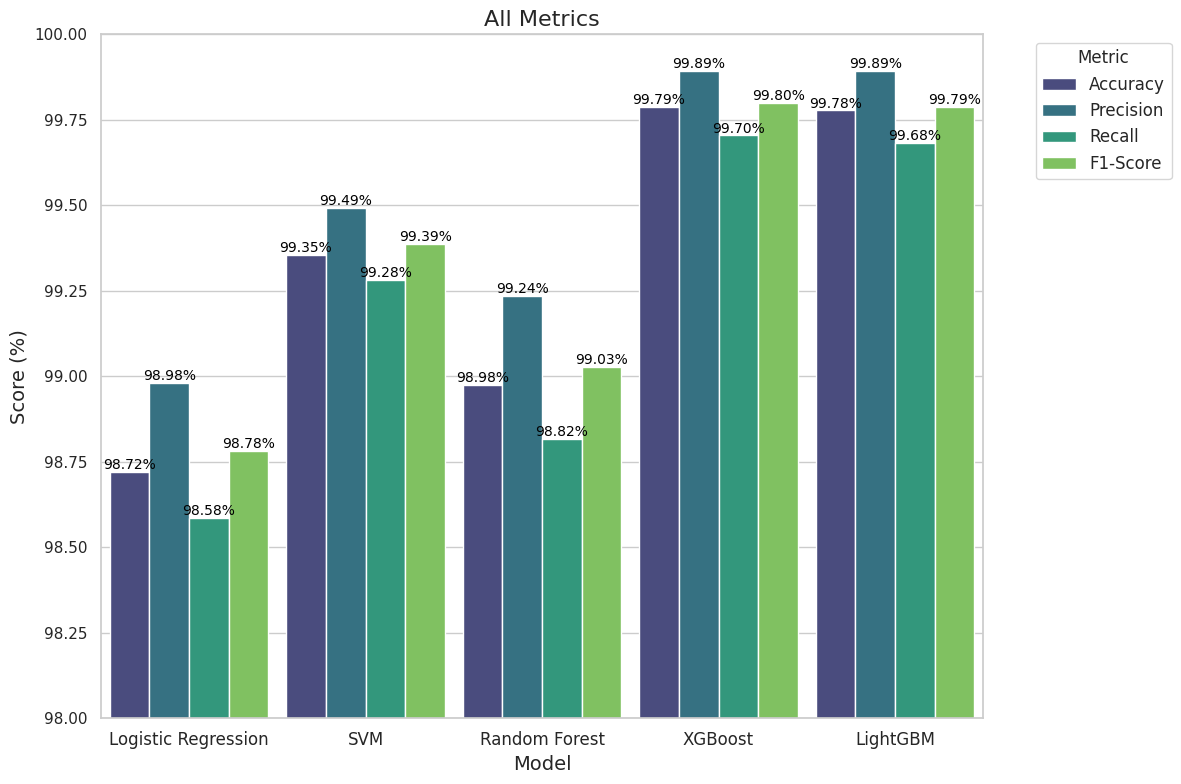

In [165]:
scores_melted = scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=scores_melted, palette='viridis', width=0.9)

plt.ylim(98, 100)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.xticks(fontsize=12)

plt.xlabel('Model', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)
plt.title('All Metrics', fontsize=16)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

## Confusion Matrix

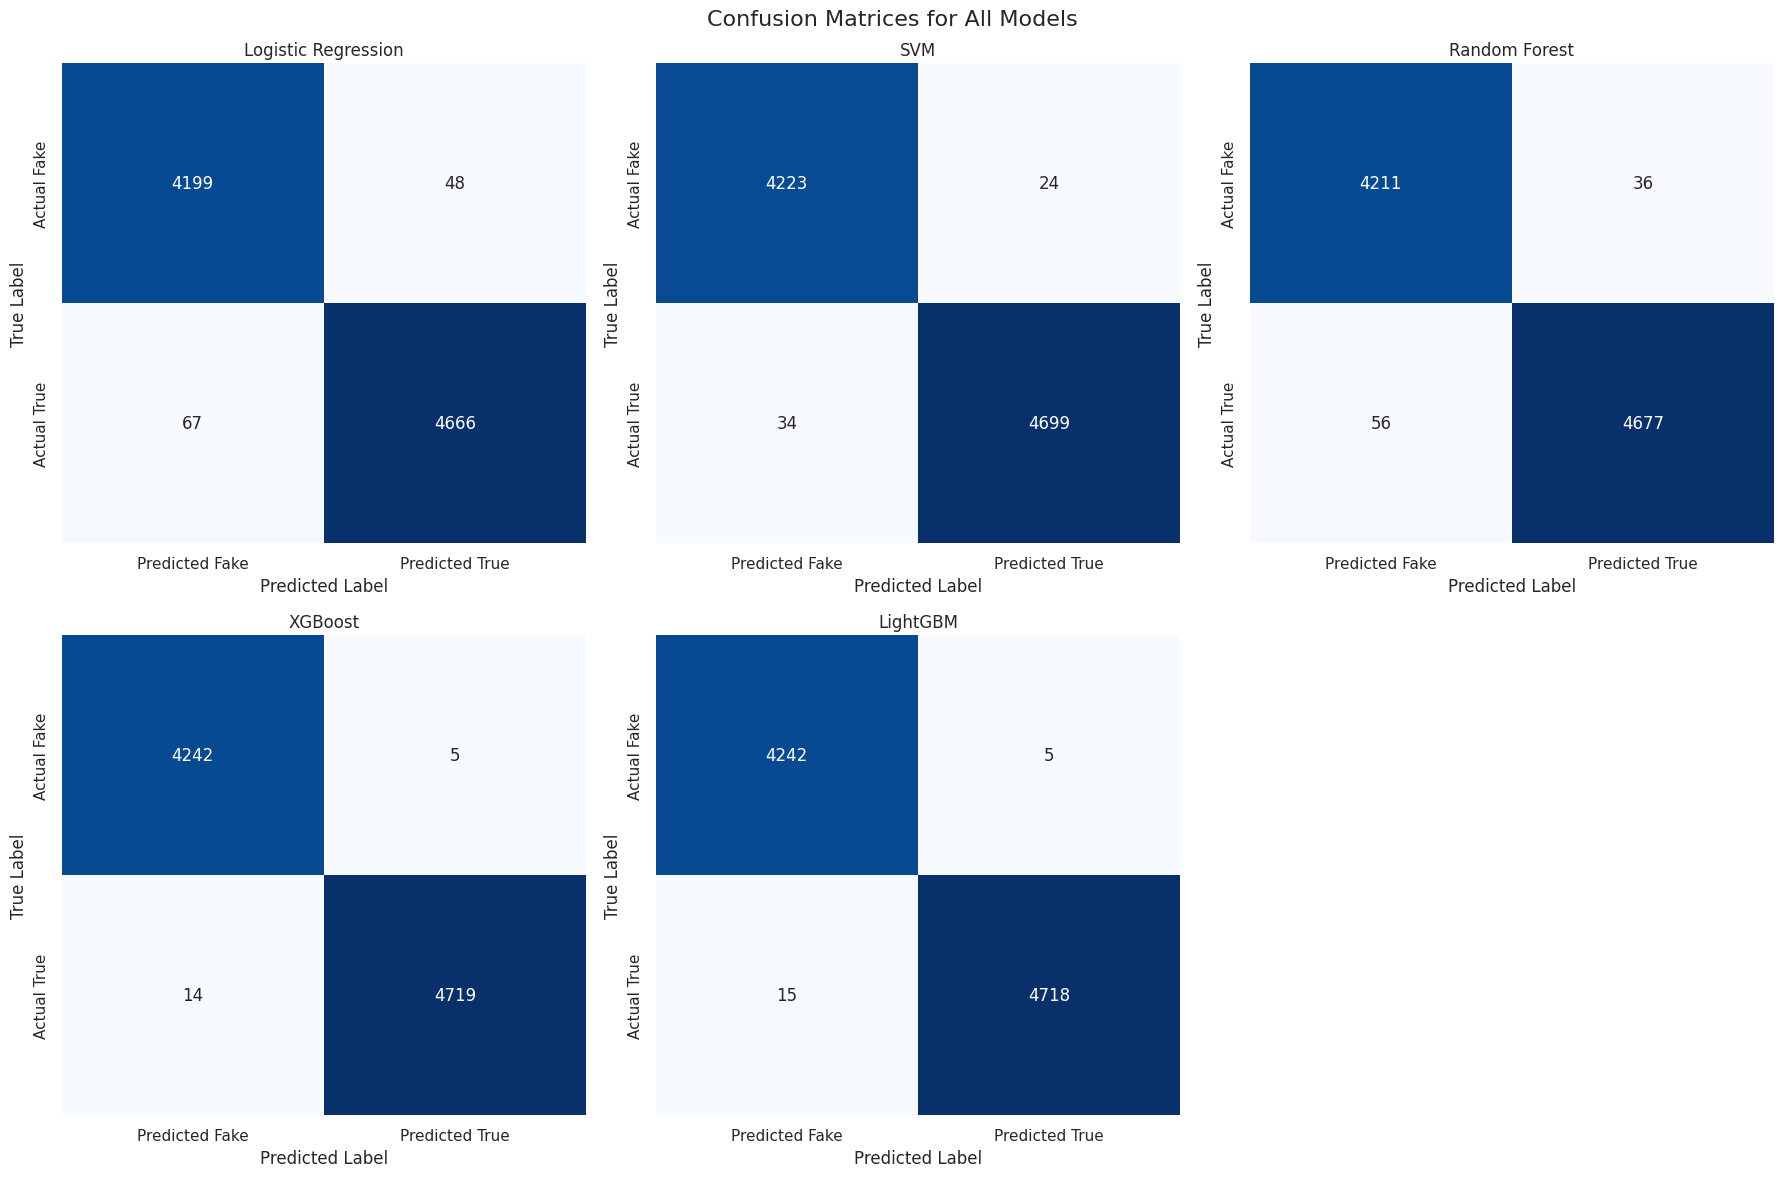

In [174]:
models = {
    'Logistic Regression': lg,
    'SVM': svm,
    'Random Forest': rf,
    'XGBoost': xgb,
    'LightGBM': lgbm
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices for All Models', fontsize=16)

axes = axes.flatten()

for (model_name, model), ax in zip(models.items(), axes):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Predicted Fake', 'Predicted True'],
                yticklabels=['Actual Fake', 'Actual True'])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'{model_name}')

if len(models) < len(axes):
    for ax in axes[len(models):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

## Accuracy

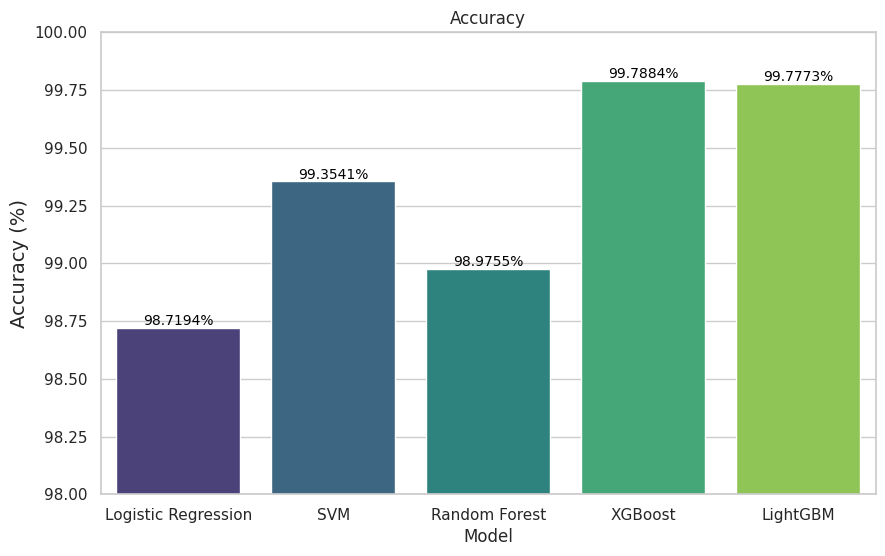

In [137]:
display_score('Accuracy')

## Precision

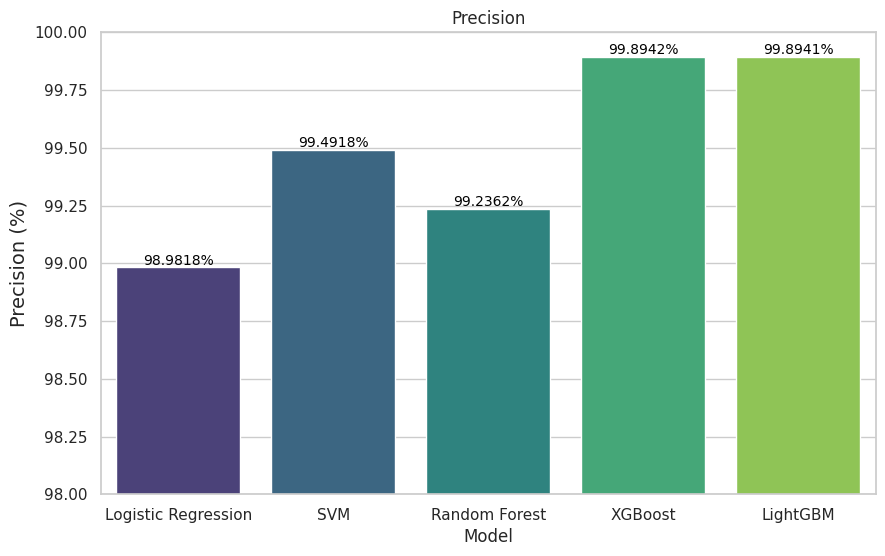

In [138]:
display_score('Precision')

## Recall

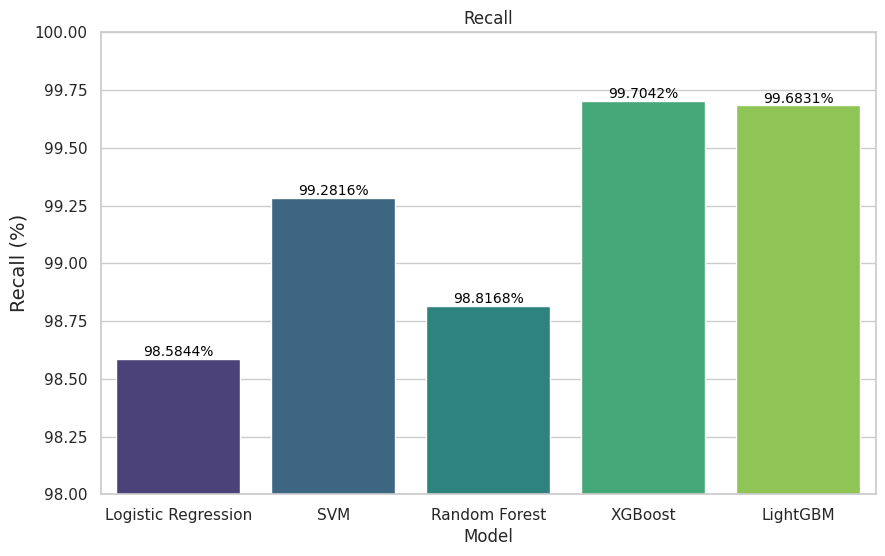

In [139]:
display_score('Recall')

## F1-Score

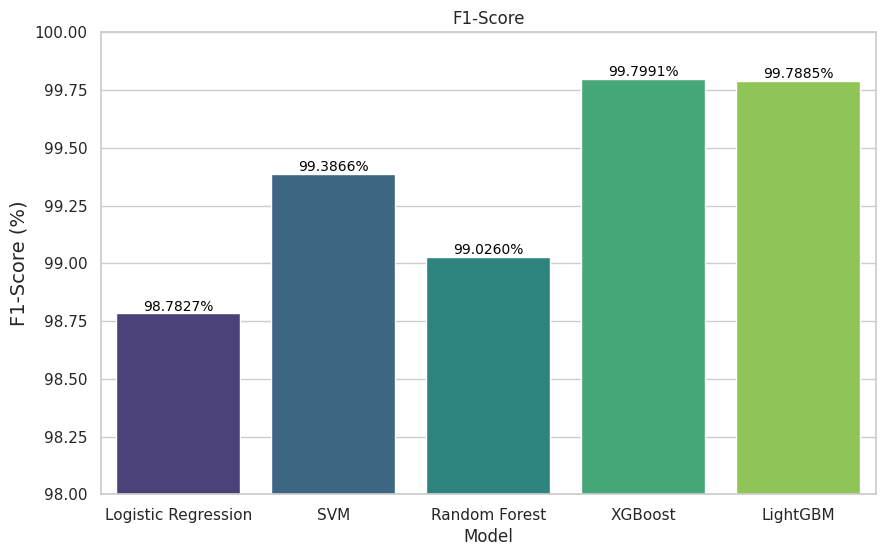

In [140]:
display_score('F1-Score')

# Checking for overfitting
___

## 5-fold cross validation

In [169]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.9967426144134551


## Train-Test accuracy

In [176]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

print('Train Accuracy: ', accuracy_score(Y_train, train_pred))
print('Test Accuracy: ', accuracy_score(Y_test, test_pred))

Train Accuracy:  0.9999721588061696
Test Accuracy:  0.9978841870824053


# Saving the model
___

In [167]:
import joblib

joblib.dump(xgb, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

# Saving all models (Optional)
___

In [166]:
import joblib

joblib.dump(lg, 'lg.pkl')
joblib.dump(svm, 'svm.pkl')
joblib.dump(rf, 'rf.pkl')
joblib.dump(xgb, 'xgb.pkl')
joblib.dump(lgbm, 'lgbm.pkl')

['lgbm.pkl']

# Load and use model (Optional)
___

In [ ]:
import joblib
import re

xgb_model = joblib.load('/kaggle/working/model.pkl')
lgb_model = joblib.load('/kaggle/working/model_lite.pkl')
vectorizer_ = joblib.load('/kaggle/working/vectorizer.pkl')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

new_text = "Testing the XGB/LGB models"
preprocessed_text = preprocess_text(new_text)
vectorized_text = vectorizer.transform([preprocessed_text])

xgb_prediction_ = xgb_model.predict(vectorized_text)
lgb_prediction_ = lgb_model.predict(vectorized_text)

print("XGB prediction: ", (True if xgb_prediction_[0] else False))
print("LGB prediction: ", (True if lgb_prediction_[0] else False))
